# Import libraries and define useful functions

In [46]:
# import libraries and define useful functions

import matplotlib.pyplot as plt
from math import sin, cos, pi, sqrt, tan, atan, asin, acos

def convert_degrees_to_radians(degrees_value) -> float:
    return degrees_value * (pi/180)

def safe_list_indexing(l, i):
    if type(i) != int:
        return 0
    if i < 0 or i >= len(l):
        return 0
    else:
        return l[i]

def basic_trajectory_model(GRAVITATIONAL_FIELD_STRENGTH, launch_angle_radians, LAUNCH_SPEED, time_step=0.0002, stop_y_value=0, stop_x_value=-1):
    TIME_STEP = time_step # seconds
    arc_length = 0


    # calculations

    x_position_data_points = []
    y_position_data_points = []


    launch_x_velocity = LAUNCH_SPEED * cos(launch_angle_radians)
    launch_y_velocity = LAUNCH_SPEED * sin(launch_angle_radians)


    # variables throughout

    current_time = 0




    # keep going until y touches zero (or blows way past that, I don't care)
    processing = True
    while processing:
        # x velocity remains constant, it is drag free
        current_x_position = current_time * launch_x_velocity

        x_position_data_points.append(current_x_position)

        # calculate y position
        # s = ut + 0.5 * at^2
        current_y_position = LAUNCH_HEIGHT + ((launch_y_velocity * current_time) + (0.5 * (-GRAVITATIONAL_FIELD_STRENGTH) * (current_time * current_time)))

        y_position_data_points.append(current_y_position)

        if current_y_position < stop_y_value:
            processing = False

        if current_x_position > stop_x_value and stop_x_value != -1:
            processing = False
        current_time += TIME_STEP

        if len(x_position_data_points) > 1:
            dy = y_position_data_points[-2] - current_y_position
            dx = x_position_data_points[-2] - current_x_position
            dy = abs(dy)
            dx = abs(dx)
            distance = sqrt(dy ** 2 + dx ** 2)
            arc_length += distance


    return x_position_data_points, y_position_data_points, arc_length


# Theory is where we know everything but absolutely nothing works
# Practice is where we know absolutely nothing but everything works
# Programming is an amalgamation of theory and practice, we know absolutely nothing and nothing works

# Challenge #1
Create a simple model of drag-free projectile
motion in a spreadsheet or via a programming language. Inputs
are: launch angle from horizontal (theta), strength of gravity g,
launch speed u and launch height h. Use a fixed increment of
time. The graph must automatically update when inputs are
changed.

Text(0, 0.5, 'Y / m')

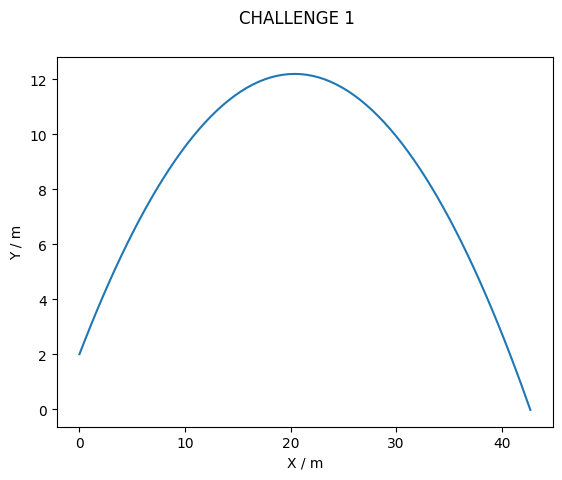

In [47]:
# inputs

LAUNCH_ANGLE = 45 # degrees
LAUNCH_SPEED = 20 # metres per second
LAUNCH_HEIGHT = 2 # metres
GRAVITATIONAL_FIELD_STRENGTH = 9.81 # newtons per kilogram of mass

TIME_STEP = 0.02 # seconds


# calculations

x_position_data_points = []
y_position_data_points = []

launch_angle_radians = convert_degrees_to_radians(LAUNCH_ANGLE)

launch_x_velocity = LAUNCH_SPEED * cos(launch_angle_radians)
launch_y_velocity = LAUNCH_SPEED * sin(launch_angle_radians)


# variables throughout

current_time = 0


# keep going until y touches zero (or blows way past that, I don't care)
processing = True
while processing:
    # x velocity remains constant, it is drag free
    current_x_position = current_time * launch_x_velocity

    x_position_data_points.append(current_x_position)

    # calculate y position
    # s = ut + 0.5 * at^2
    current_y_position = LAUNCH_HEIGHT + ((launch_y_velocity * current_time) + (0.5 * (-GRAVITATIONAL_FIELD_STRENGTH) * (current_time * current_time)))

    y_position_data_points.append(current_y_position)

    if current_y_position <= 0:
        processing = False
    current_time += TIME_STEP


# plotting
figure = plt.figure()
plt.plot(x_position_data_points, y_position_data_points)
figure.suptitle("CHALLENGE 1")
plt.xlabel("X / m")
plt.ylabel("Y / m")



# Challenge #2
Create a more sophisticated exact (‘analytic’) model using equations for the
projectile trajectory. In this case define a equally spaced array of x coordinate values
between 0 and the maximum horizontal range R. Plot the trajectory and the apogee.

Text(0, 0.5, 'Y / m')

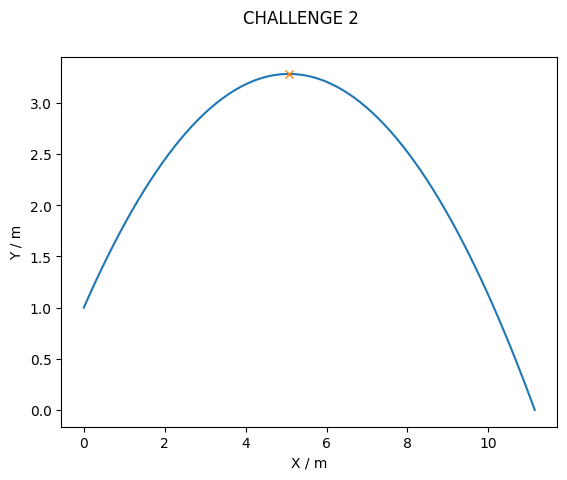

In [48]:
# inputs

LAUNCH_ANGLE = 42 # degrees
LAUNCH_SPEED = 10 # metres per second
LAUNCH_HEIGHT = 1 # metres
GRAVITATIONAL_FIELD_STRENGTH = 9.81 # newtons per kilogram of mass

TIME_STEP = 0.02 # seconds

# calculations

x_position_data_points = []
y_position_data_points = []

launch_angle_radians = convert_degrees_to_radians(LAUNCH_ANGLE)

x_apogee = ((LAUNCH_SPEED ** 2) * sin(launch_angle_radians) * cos(launch_angle_radians))/GRAVITATIONAL_FIELD_STRENGTH
y_apogee = LAUNCH_HEIGHT + ((LAUNCH_SPEED ** 2) * sin(launch_angle_radians) ** 2)/(2*GRAVITATIONAL_FIELD_STRENGTH)


range = (LAUNCH_SPEED ** 2 * (sin(launch_angle_radians) * cos(launch_angle_radians) + cos(launch_angle_radians) * sqrt(abs(sin(launch_angle_radians) ** 2 + ((2 * GRAVITATIONAL_FIELD_STRENGTH * LAUNCH_HEIGHT) / (LAUNCH_SPEED ** 2)))))) / GRAVITATIONAL_FIELD_STRENGTH
time_of_flight = range / (LAUNCH_SPEED * cos(launch_angle_radians))

current_time = 0


x_positions = []
y_positions = []

while current_time < time_of_flight:
    x_pos = current_time * LAUNCH_SPEED * cos(launch_angle_radians)
    y_pos = LAUNCH_HEIGHT + x_pos * tan(launch_angle_radians) - ((GRAVITATIONAL_FIELD_STRENGTH*(1+ (tan(launch_angle_radians) ** 2)) * x_pos ** 2)/(2 * LAUNCH_SPEED ** 2))
    current_time += TIME_STEP
    x_positions.append(x_pos)
    y_positions.append(y_pos)


# plotting
figure = plt.figure()
plt.plot(x_positions, y_positions)
plt.plot(x_apogee, y_apogee, marker="x")
figure.suptitle("CHALLENGE 2")
plt.xlabel("X / m")
plt.ylabel("Y / m")

# Challenge #3
Create a new projectile model which is based upon calculating trajectories
that are launched from (0,0) and pass through a fixed position (X,Y). Calculate the minimum
launch speed to achieve this, and hence determine ‘low ball’ and ‘high ball’ trajectories.

114.82569697259082
1.3253412479491977 0.5369118733235659
27.43509191677943 7.758322306714052
0.9311265606363819
14.589389487045038


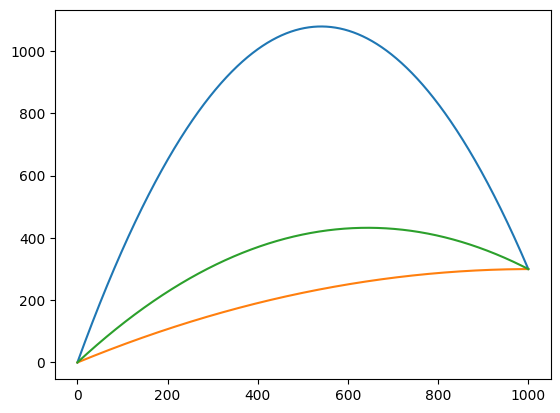

In [49]:
# inputs

TARGET_X = 1000 # m
TARGET_Y = 300 # m

GRAVITATIONAL_FIELD_STRENGTH = 9.81 # Newtons per kilogram of mass

LAUNCH_SPEED = 150 # m/s

LAUNCH_HEIGHT = 0 # m

# calculations

min_launch_speed = sqrt(GRAVITATIONAL_FIELD_STRENGTH) * sqrt(TARGET_Y + sqrt(TARGET_X ** 2 + TARGET_Y ** 2))

# quadratic constants

a = (GRAVITATIONAL_FIELD_STRENGTH * TARGET_X ** 2) / (2 * LAUNCH_SPEED ** 2)
b = - TARGET_X
c = TARGET_Y - LAUNCH_HEIGHT + (GRAVITATIONAL_FIELD_STRENGTH * TARGET_X ** 2) / (2 * LAUNCH_SPEED ** 2)

val1 = atan((-b + sqrt(b**2 - 4 * a * c))/(2 * a))
val2 = atan((-b - sqrt(b**2 - 4 * a * c))/(2 * a))

# find which angle is which

highball_angle = max(val1, val2)
lowball_angle = min(val1, val2)

print(min_launch_speed)
print(highball_angle, lowball_angle)

# high ball

horizontal_velocity_high = LAUNCH_SPEED * cos(highball_angle)
time_of_flight_high = TARGET_X / horizontal_velocity_high

# low ball

horizontal_velocity_low = LAUNCH_SPEED * cos(lowball_angle)
time_of_flight_low = TARGET_X / horizontal_velocity_low

print(time_of_flight_high, time_of_flight_low)


# min speed

min_speed_angle = atan((TARGET_Y + sqrt(TARGET_X ** 2 + TARGET_Y ** 2))/TARGET_X)
horizontal_min_speed = min_launch_speed * cos(min_speed_angle)
min_speed_time_of_flight = TARGET_X / horizontal_min_speed
print(min_speed_angle)
print(min_speed_time_of_flight)

# use basic model

high_ball_trajectory = basic_trajectory_model(GRAVITATIONAL_FIELD_STRENGTH, highball_angle, LAUNCH_SPEED, stop_x_value = TARGET_X)
low_ball_trajectory = basic_trajectory_model(GRAVITATIONAL_FIELD_STRENGTH, lowball_angle, LAUNCH_SPEED, stop_x_value = TARGET_X)
slow_ball_trajectory = basic_trajectory_model(GRAVITATIONAL_FIELD_STRENGTH, min_speed_angle, min_launch_speed, stop_x_value = TARGET_X)

# plot

fig = plt.figure()

plt.plot(high_ball_trajectory[0], high_ball_trajectory[1])
plt.plot(low_ball_trajectory[0], low_ball_trajectory[1])
plt.plot(slow_ball_trajectory[0], slow_ball_trajectory[1])



#Challenge #4
Create a new projectile model which compares a trajectory to the trajectory
which maximizes horizontal range given the same launch height and launch speed. Inputs
are u,h,g and theta . For the maximum range trajectory you need to calculate the optimum angle.
For h > 0 note this is not 45 degrees

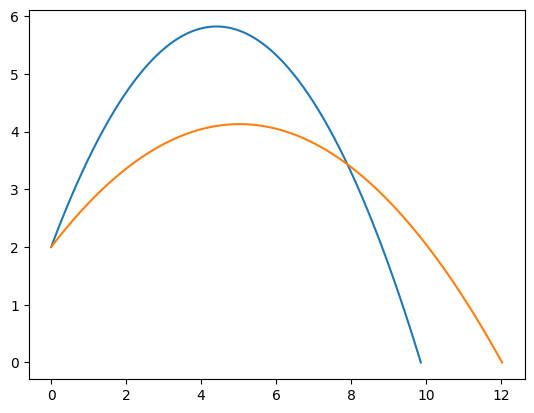

In [50]:
# inputs

GRAVITATIONAL_FIELD_STRENGTH = 9.81 # Newtons per kilogram of mass
LAUNCH_SPEED = 10
LAUNCH_HEIGHT = 2
LAUNCH_ANGLE = 60 # degrees

launch_angle_radians = convert_degrees_to_radians(LAUNCH_ANGLE)

max_range = (LAUNCH_SPEED ** 2 * sqrt(1 + (2 * GRAVITATIONAL_FIELD_STRENGTH * LAUNCH_HEIGHT)/(LAUNCH_SPEED ** 2))/GRAVITATIONAL_FIELD_STRENGTH)
range = (LAUNCH_SPEED ** 2 * (sin(launch_angle_radians) * cos(launch_angle_radians) + cos(launch_angle_radians) * sqrt(abs(sin(launch_angle_radians) ** 2 + ((2 * GRAVITATIONAL_FIELD_STRENGTH * LAUNCH_HEIGHT) / (LAUNCH_SPEED ** 2)))))) / GRAVITATIONAL_FIELD_STRENGTH


max_angle = asin(1/sqrt((2 +( 2 * GRAVITATIONAL_FIELD_STRENGTH * LAUNCH_HEIGHT )/ (LAUNCH_SPEED ** 2))))

trajectory = basic_trajectory_model(GRAVITATIONAL_FIELD_STRENGTH, launch_angle_radians, LAUNCH_SPEED, stop_x_value = range)
trajectory_max = basic_trajectory_model(GRAVITATIONAL_FIELD_STRENGTH, max_angle, LAUNCH_SPEED, stop_x_value=max_range)

fig = plt.figure()
plt.plot(trajectory[0], trajectory[1])
plt.plot(trajectory_max[0], trajectory_max[1])

#Challenge #5
Update your projectile model of a trajectory which passes through (X,Y) with
the bounding parabola, in addition to minimum speed, max range and high and low ball
curves. The bounding parabola marks the region where possible (X,Y) coordinates could be
reached given u,h,g inputs.

114.82569697259082
1.3262197603362678 0.5360333609364959
27.49051047761508 7.742682180384377
0.9311265606363819
14.589389487045038


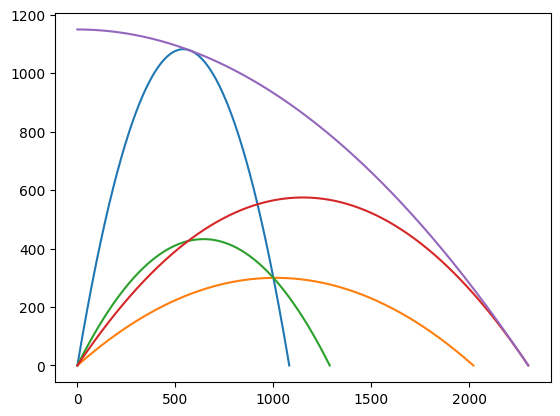

In [51]:
# inputs

TARGET_X = 1000 # m
TARGET_Y = 300 # m

GRAVITATIONAL_FIELD_STRENGTH = 9.81 # Newtons per kilogram of mass

LAUNCH_SPEED = 1.3063*115 # m/s

LAUNCH_HEIGHT = 0 # m

# calculations

min_launch_speed = sqrt(GRAVITATIONAL_FIELD_STRENGTH) * sqrt(TARGET_Y + sqrt(TARGET_X ** 2 + TARGET_Y ** 2))


# max range
max_range = (LAUNCH_SPEED ** 2 * sqrt(1 + (2 * GRAVITATIONAL_FIELD_STRENGTH * LAUNCH_HEIGHT)/(LAUNCH_SPEED ** 2))/GRAVITATIONAL_FIELD_STRENGTH)


max_angle = asin(1/sqrt((2 +( 2 * GRAVITATIONAL_FIELD_STRENGTH * LAUNCH_HEIGHT )/ (LAUNCH_SPEED ** 2))))
trajectory_max = basic_trajectory_model(GRAVITATIONAL_FIELD_STRENGTH, max_angle, LAUNCH_SPEED, stop_x_value=max_range)


# quadratic constants

a = (GRAVITATIONAL_FIELD_STRENGTH * TARGET_X ** 2) / (2 * LAUNCH_SPEED ** 2)
b = - TARGET_X
c = TARGET_Y - LAUNCH_HEIGHT + (GRAVITATIONAL_FIELD_STRENGTH * TARGET_X ** 2) / (2 * LAUNCH_SPEED ** 2)

val1 = atan((-b + sqrt(b**2 - 4 * a * c))/(2 * a))
val2 = atan((-b - sqrt(b**2 - 4 * a * c))/(2 * a))

# find which angle is which

highball_angle = max(val1, val2)
lowball_angle = min(val1, val2)

print(min_launch_speed)
print(highball_angle, lowball_angle)

# high ball

horizontal_velocity_high = LAUNCH_SPEED * cos(highball_angle)
time_of_flight_high = TARGET_X / horizontal_velocity_high

# low ball

horizontal_velocity_low = LAUNCH_SPEED * cos(lowball_angle)
time_of_flight_low = TARGET_X / horizontal_velocity_low

print(time_of_flight_high, time_of_flight_low)


# min speed

min_speed_angle = atan((TARGET_Y + sqrt(TARGET_X ** 2 + TARGET_Y ** 2))/TARGET_X)
horizontal_min_speed = min_launch_speed * cos(min_speed_angle)
min_speed_time_of_flight = TARGET_X / horizontal_min_speed
print(min_speed_angle)
print(min_speed_time_of_flight)

# use basic model


high_ball_trajectory = basic_trajectory_model(GRAVITATIONAL_FIELD_STRENGTH, highball_angle, LAUNCH_SPEED)
low_ball_trajectory = basic_trajectory_model(GRAVITATIONAL_FIELD_STRENGTH, lowball_angle, LAUNCH_SPEED)
slow_ball_trajectory = basic_trajectory_model(GRAVITATIONAL_FIELD_STRENGTH, min_speed_angle, min_launch_speed)

# function for bounding parabola

def bounding_parabola(x, u, g):
    l = (u**2)/(2*g)
    r = (g * x ** 2)/(2*u*u)
    return l - r

bounding_x = []
bounding_y = []

x = 0

while x <= max_range:
    bounding_x.append(x)
    bounding_y.append(bounding_parabola(x, LAUNCH_SPEED, GRAVITATIONAL_FIELD_STRENGTH))
    x += 1

# plot

fig = plt.figure()

plt.plot(high_ball_trajectory[0], high_ball_trajectory[1])
plt.plot(low_ball_trajectory[0], low_ball_trajectory[1])
plt.plot(slow_ball_trajectory[0], slow_ball_trajectory[1])
plt.plot(trajectory_max[0], trajectory_max[1])
plt.plot(bounding_x, bounding_y)


# Challenge #6
Now update your projectile model with a calculation of the distance travelled
by the projectile i.e. the length of the inverted parabolic arc.

MAX DISTANCE:  13.968277365088015


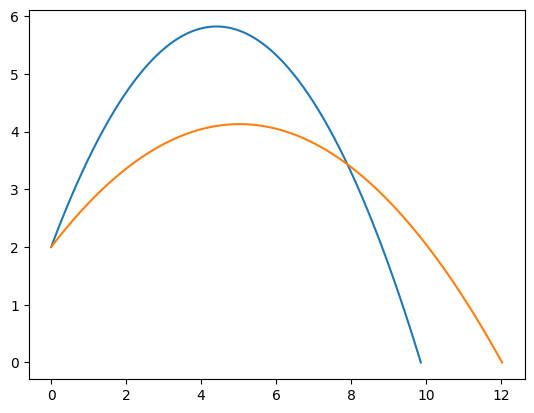

In [52]:
# inputs

GRAVITATIONAL_FIELD_STRENGTH = 9.81 # Newtons per kilogram of mass
LAUNCH_SPEED = 10
LAUNCH_HEIGHT = 2
LAUNCH_ANGLE = 60 # degrees

launch_angle_radians = convert_degrees_to_radians(LAUNCH_ANGLE)

max_range = (LAUNCH_SPEED ** 2 * sqrt(1 + (2 * GRAVITATIONAL_FIELD_STRENGTH * LAUNCH_HEIGHT)/(LAUNCH_SPEED ** 2))/GRAVITATIONAL_FIELD_STRENGTH)
range = (LAUNCH_SPEED ** 2 * (sin(launch_angle_radians) * cos(launch_angle_radians) + cos(launch_angle_radians) * sqrt(abs(sin(launch_angle_radians) ** 2 + ((2 * GRAVITATIONAL_FIELD_STRENGTH * LAUNCH_HEIGHT) / (LAUNCH_SPEED ** 2)))))) / GRAVITATIONAL_FIELD_STRENGTH


max_angle = asin(1/sqrt((2 +( 2 * GRAVITATIONAL_FIELD_STRENGTH * LAUNCH_HEIGHT )/ (LAUNCH_SPEED ** 2))))

trajectory = basic_trajectory_model(GRAVITATIONAL_FIELD_STRENGTH, launch_angle_radians, LAUNCH_SPEED, stop_x_value = range)
trajectory_max = basic_trajectory_model(GRAVITATIONAL_FIELD_STRENGTH, max_angle, LAUNCH_SPEED, stop_x_value=max_range)

fig = plt.figure()
plt.plot(trajectory[0], trajectory[1])
plt.plot(trajectory_max[0], trajectory_max[1])
print("MAX DISTANCE: ", trajectory_max[2])